In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('/root/tempfile/train_final121702.csv')
test_df = pd.read_csv('/root/tempfile/test_final121702.csv')

In [3]:
print(train_df.shape, test_df.shape)

(199710, 481) (123623, 480)


In [4]:
feature_col = [x for x in train_df.columns if x not in ['card_id','target']]
testindex = test_df.card_id

y_train = train_df.target.values.astype('float')
x_train = train_df[feature_col].values.astype('float')
x_test = test_df[feature_col].values.astype('float')

del train_df, test_df

In [5]:
str_label = [
    'auth_city_id_cal_mode',
    'auth_merchant_category_id_cal_mode', 
    'auth_merchant_id_cal_mode',
    'feature_1',
    'feature_2',
    'feature_3', 
    'new_city_id_cal_mode', 
    'new_merchant_category_id_cal_mode',
    'new_merchant_id_cal_mode', 
    'unauth_city_id_cal_mode', 
    'unauth_merchant_category_id_cal_mode', 
    'unauth_merchant_id_cal_mode'
]


In [6]:
lgb_model = lgb.LGBMRegressor(objective='regression',
                              min_data_in_leaf=20,
                              num_leaves=50,
                              learning_rate=0.1, 
                              max_depth=8,
                              bagging_fraction = 0.8,
                              feature_fraction = 0.8,
                              num_threads=4)

In [12]:
params_test1={
    'max_depth': range(9,11,1),
    'num_leaves': range(120, 180, 20),
    'min_data_in_leaf': range(100,300,20)
}
gsearch1 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test1,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs1 = gsearch1.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 14.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 61.8min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed: 95.9min finished


In [13]:
print(gs1.best_params_, gs1.best_score_)

{'max_depth': 10, 'min_data_in_leaf': 280, 'num_leaves': 120} -2.4260136648237998


In [14]:
params_test2={
    'max_depth': range(8,11,1),
    'num_leaves': range(90, 210, 20),
    'min_data_in_leaf': range(190,300,20)
}
gsearch2 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test2,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs2 = gsearch2.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 12.5min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 52.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 129.3min
[Parallel(n_jobs=2)]: Done 540 out of 540 | elapsed: 159.1min finished


In [15]:
print(gs2.best_params_, gs2.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 290, 'num_leaves': 110} -2.424251742856599


In [26]:
gs2.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_data_in_leaf', 'param_num_leaves', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [67]:
params_test3={
    'max_depth': [9],
    'num_leaves': range(90, 131, 5),
    'min_data_in_leaf': range(270,341, 5)
}
gsearch3 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test3,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs3 = gsearch3.fit(x_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 13.3min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 56.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 128.3min
[Parallel(n_jobs=2)]: Done 675 out of 675 | elapsed: 193.1min finished


In [68]:
print(gs3.best_params_, gs3.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 290, 'num_leaves': 110} -2.424251742856599


In [77]:
gs3.cv_results_['mean_test_score']

array([-2.42537944, -2.42672743, -2.4263556 , -2.42703581, -2.42750174,
       -2.42543779, -2.42741712, -2.42802904, -2.42821529, -2.42774088,
       -2.42666973, -2.42715992, -2.42688314, -2.4259147 , -2.42806232,
       -2.42785071, -2.42683725, -2.42534773, -2.42614322, -2.4274158 ,
       -2.42455651, -2.42648201, -2.42721139, -2.42685238, -2.42788002,
       -2.42818259, -2.42771749, -2.4268317 , -2.42647517, -2.4267938 ,
       -2.42445935, -2.42762039, -2.42742672, -2.42842136, -2.42897762,
       -2.42875827, -2.42694511, -2.42750008, -2.42717252, -2.42688905,
       -2.42425174, -2.42870704, -2.42843688, -2.42849466, -2.42627763,
       -2.42657916, -2.42796088, -2.42616613, -2.42509586, -2.42582779,
       -2.42539525, -2.42835499, -2.42610689, -2.42551411, -2.42641857,
       -2.42681655, -2.42661236, -2.42653385, -2.42722264, -2.42699507,
       -2.42981406, -2.42745019, -2.4261826 , -2.42572372, -2.42620338,
       -2.42685872, -2.42567469, -2.42596692, -2.42818838, -2.42

In [7]:
params_test4={
    'max_depth': [9],
    'num_leaves': range(93, 98, 1),
    'min_data_in_leaf': range(333, 338, 1)
}
gsearch4 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test4,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs4 = gsearch4.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 12.9min
[Parallel(n_jobs=2)]: Done 125 out of 125 | elapsed: 35.0min finished


In [8]:
print(gs4.best_params_, gs4.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 337, 'num_leaves': 95} -2.423977833190758


In [9]:
gs4.cv_results_['mean_test_score']

array([-2.42674247, -2.4255113 , -2.42752359, -2.42559661, -2.42664298,
       -2.42449182, -2.42698194, -2.42506807, -2.42561108, -2.42598433,
       -2.42600035, -2.42618394, -2.42432601, -2.42694565, -2.42599039,
       -2.42603374, -2.4268669 , -2.42536598, -2.4270285 , -2.42654753,
       -2.42624308, -2.42518768, -2.42397783, -2.42716676, -2.42547101])

In [8]:
params_test5 = {
    'max_depth': [9],
    'num_leaves': [95],
    'min_data_in_leaf': [337],
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],  
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}
gsearch5 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test5,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs5 = gsearch5.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 11.8min
[Parallel(n_jobs=2)]: Done 125 out of 125 | elapsed: 32.4min finished


In [9]:
print(gs5.best_params_, gs5.best_score_)

{'bagging_fraction': 0.6, 'feature_fraction': 0.8, 'max_depth': 9, 'min_data_in_leaf': 337, 'num_leaves': 95} -2.423977833190758


In [14]:
gs5.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_bagging_fraction', 'param_feature_fraction', 'param_max_depth', 'param_min_data_in_leaf', 'param_num_leaves', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [19]:
params_test6 = {
    'max_depth': [9],
    'num_leaves': [95],
    'min_data_in_leaf': [337],
    'feature_fraction': np.arange(0.75, 0.85, 0.01)
}
gsearch6 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test6,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs6 = gsearch6.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 12.8min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 13.9min finished


In [20]:
print(gs6.best_params_, gs6.best_score_)

{'feature_fraction': 0.8, 'max_depth': 9, 'min_data_in_leaf': 337, 'num_leaves': 95} -2.423977833190758


In [21]:
gs6.cv_results_['mean_test_score']

array([-2.42639669, -2.42607401, -2.42648612, -2.42552175, -2.42589299,
       -2.42397783, -2.4262322 , -2.42618736, -2.42571919, -2.42820866])

In [22]:
params_test7 = {
    'max_depth': [9],
    'num_leaves': [95],
    'min_data_in_leaf': [337],
    'feature_fraction': [0.8],
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],   
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}

gsearch7 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test7,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs7 = gsearch7.fit(x_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 12.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 55.5min
[Parallel(n_jobs=2)]: Done 245 out of 245 | elapsed: 69.4min finished


In [23]:
print(gs7.best_params_, gs7.best_score_)

{'feature_fraction': 0.8, 'max_depth': 9, 'min_data_in_leaf': 337, 'num_leaves': 95, 'reg_alpha': 0, 'reg_lambda': 0.001} -2.4239778107632275


In [24]:
gs7.cv_results_['mean_test_score']

array([-2.42397783, -2.42397781, -2.42497859, -2.42535702, -2.42507876,
       -2.42693879, -2.42670578, -2.42408668, -2.42408666, -2.42523135,
       -2.42541403, -2.42488706, -2.42579152, -2.42670571, -2.42564882,
       -2.4256488 , -2.42543093, -2.42466286, -2.42434994, -2.42534455,
       -2.42661401, -2.42554041, -2.4262941 , -2.4267666 , -2.42724409,
       -2.42607821, -2.42578284, -2.42695766, -2.42635039, -2.42635037,
       -2.42683644, -2.42684309, -2.42573247, -2.426235  , -2.42629025,
       -2.42588497, -2.42590808, -2.42593702, -2.42656783, -2.42636891,
       -2.42514231, -2.42623189, -2.42647115, -2.42647113, -2.4259192 ,
       -2.42597864, -2.42610587, -2.4246232 , -2.42572516])

In [25]:
spt = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

params_test11={
    'max_depth': 9,
    'num_leaves': 95,
    'min_data_in_leaf':337,
    'reg_alpha': 0,   
    'reg_lambda': 0.001,
    'learning_rate':0.001,
    'bagging_fraction' : 0.8,
    'feature_fraction' : 0.8,
    'objective':'regression',
    'metric':'mse'
}

data_train = lgb.Dataset(spt[0], spt[2], silent=True)
data_test = lgb.Dataset(spt[1], spt[3], silent=True)

lgb_model = lgb.train(
    params_test11,
    data_train,
    valid_sets=[data_test, data_train],
    num_boost_round=20000, 
    early_stopping_rounds=200,
    verbose_eval=100)

Training until validation scores don't improve for 200 rounds.
[100]	training's l2: 2.86928	valid_0's l2: 2.88173
[200]	training's l2: 2.80153	valid_0's l2: 2.81967
[300]	training's l2: 2.74451	valid_0's l2: 2.76792
[400]	training's l2: 2.69602	valid_0's l2: 2.72455
[500]	training's l2: 2.6546	valid_0's l2: 2.68759
[600]	training's l2: 2.61907	valid_0's l2: 2.65655
[700]	training's l2: 2.58839	valid_0's l2: 2.63048
[800]	training's l2: 2.56178	valid_0's l2: 2.60823
[900]	training's l2: 2.53835	valid_0's l2: 2.58908
[1000]	training's l2: 2.51767	valid_0's l2: 2.57256
[1100]	training's l2: 2.49945	valid_0's l2: 2.55859
[1200]	training's l2: 2.48331	valid_0's l2: 2.54661
[1300]	training's l2: 2.46891	valid_0's l2: 2.53638
[1400]	training's l2: 2.45586	valid_0's l2: 2.52766
[1500]	training's l2: 2.44396	valid_0's l2: 2.51999
[1600]	training's l2: 2.43311	valid_0's l2: 2.51312
[1700]	training's l2: 2.42319	valid_0's l2: 2.50701
[1800]	training's l2: 2.41393	valid_0's l2: 2.50157
[1900]	trai

In [26]:
y_test = lgb_model.predict(x_test)

In [27]:
feature_importance = lgb_model.feature_importance()
importance_df = pd.DataFrame({'importance':feature_importance,'name':feature_col})
importance_df.shape

(479, 2)

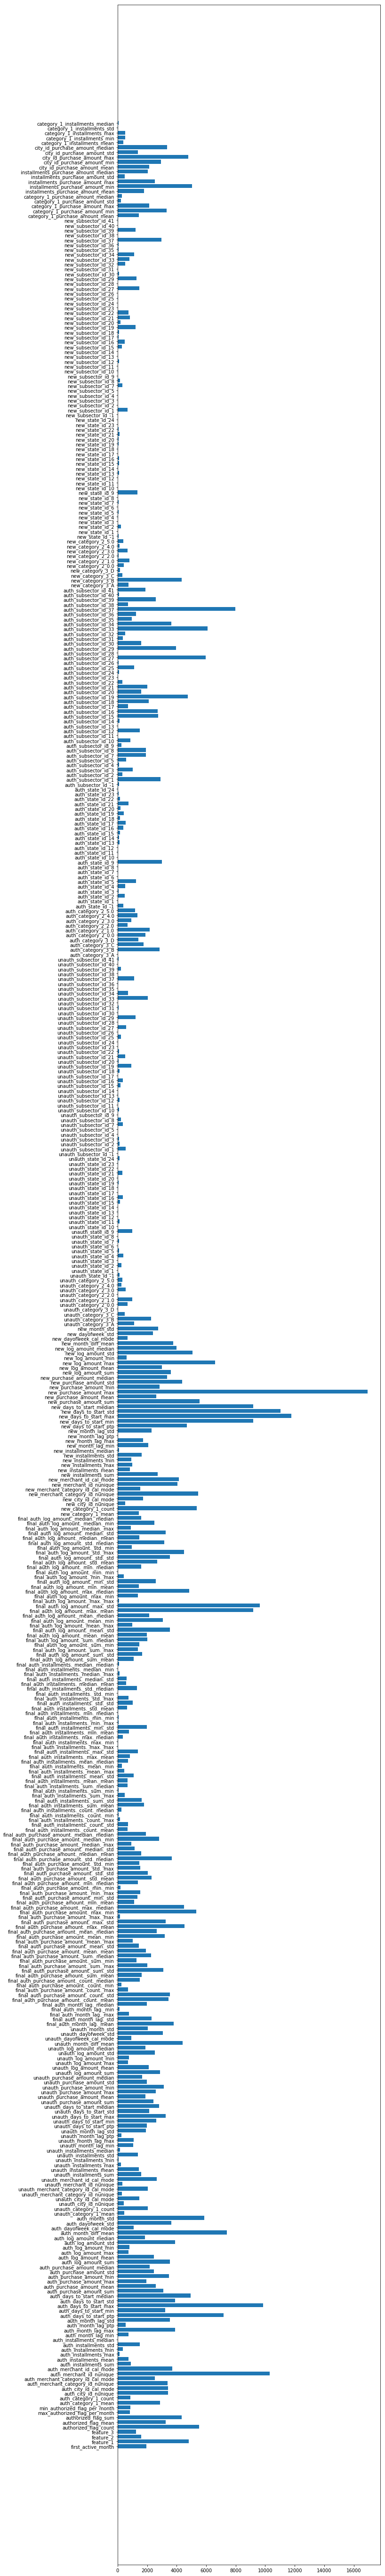

In [30]:
plt.figure(figsize=[10,100])
plt.barh(importance_df.name, importance_df.importance)
plt.show()

In [31]:
submission = pd.DataFrame({'card_id':testindex, 'target':y_test})

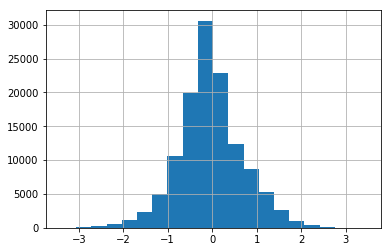

In [33]:
submission.target.hist(bins=20)

In [36]:
submission.to_csv('/root/tempfile/submission122001.csv',index=False)